In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [29]:
def get_L(n_array):
    L = n_array.sum()
    return L

def get_K(b_array):
    K = b_array[1:].sum()
    return K

def get_u(c, p):
    sigma = p['sigma']
    u = (c**(1-sigma) -1)/(1-sigma)
    return u

def u_prime(c, p):
    sigma = p['sigma']
    u_prime = c**(-sigma)
    return u_prime
    
    return u_prime
def get_w(K, L, p):
    A = p['A']
    alpha = p['alpha']
    w = (1-alpha)*A*(K/L)**alpha
    return w

def get_r(K, L, p):
    alpha = p['alpha']
    A = p ['A']
    delta = p['delta']
    r = alpha*A*(L/K)**(1-alpha) - delta
    
    return r


def get_c(b, p, f):
    n = p['n']
    w = f['w'](f['K'](b), f['L'](n), p)
    r = f['r'](f['K'](b), f['L'](n), p)
    
    c = np.zeros(S)
    for i in range(b.shape[0]-1):
        c[i] = (1+r)*b[i]+w*n[i]-b[i+1]
        
        
    return c



In [30]:

def equations_ss_b(b, p, f):
    """ Takes in a guess for b and a dictionary of functions 
    f and a dictionary of elemtns p."""
    b = np.insert(b, 0, 0)
    n = p['n']
    w = f['w'](f['K'](b), f['L'](n), p)
    r = f['r'](f['K'](b), f['L'](n), p)
    euler_list = []
    
    # Adding the first case where 1 = 0
    e_l = f['u_p'](w*n[0]+(1+r)*0-b[1], p)
    e_r = p['beta']*(1+r)*f['u_p'](w*n[1] + (1+r)*b[1]-b[2], p)
    
    e = e_l - e_r
    
    euler_list.append(e)

    # Adding all other cases
    for i in range(1, S-2):

        e_l = f['u_p'](w*n[i]+(1+r)*b[i]-b[i+1], p)
        e_r = p['beta']*(1+r)*f['u_p'](w*n[i+1] + (1+r)*b[i+1]-b[i+2], p)

        e = e_l - e_r
        
        euler_list.append(e)
    
    # Adding the case where S+1 =0
    e_l = f['u_p'](w*n[S-2]+(1+r)*b[S-2]-b[S-1], p)
    e_r = p['beta']*(1+r)*f['u_p'](w*n[S-1] + (1+r)*b[S-1], p)

    e = e_l - e_r

    euler_list.append(e)

    return euler_list
    
def get_ss_b(bvec_guess, p, f):
    n = p['n']
    b_ss = np.zeros_like(bvec_guess)
    F = lambda b: equations_ss_b(b, p, f)
    b_ss[1:] = fsolve(F, bvec_guess[1:])
    b_ss[0] = 0
    c_ss = f['c'](np.insert(b_ss, -1, 0), p, f)
    w_ss = f['w'](f['K'](b_ss), f['L'](n), p)
    r_ss = f['r'](f['K'](b_ss), f['L'](n), p)
    
    return b_ss, c_ss, w_ss, r_ss




In [31]:
def feasible(bvec_guess, f_params, functions):
    b_ss, c_ss, w_ss, r_ss = get_ss_b(bvec_guess, f_params, functions)
    K_cnstr = np.array([False])
    K_cnstr[0] = True if functions['K'](b_ss) <= 0 else False
    
    c_cnstr = c_ss
    c_cnstr = c_cnstr < 0 
    
    b_cnstr = np.array([False]*S)
    
    b_cnstr[1] = True if c_cnstr[0] or (c_cnstr[1]) else False
    b_cnstr[-1] = True if c_cnstr[-1] or (c_cnstr[-2]) else False
    
    return b_cnstr[1:], c_cnstr, K_cnstr

In [32]:
S = 80
functions = {'L':get_L, 'K':get_K, 'r':get_r, 'u':get_u, 'u_p':u_prime, 
             'w':get_w,'c':get_c}

params = {'beta':0.96**(80/S), 'delta': 1- (1-0.05)**(80/S), 'sigma':3 , \
          'A':1, 'alpha':0.35, 'n':np.array([1]*(int(2*S/3)+1) +[.2]*(int(S-2*S/3)))}

In [33]:
b_ss, c_ss, w_ss, r_ss = get_ss_b(np.ones(80)*0.1, params, functions)

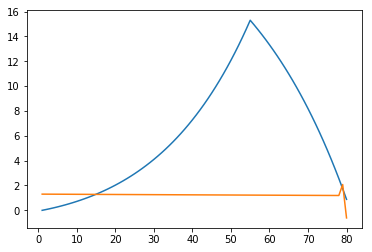

In [36]:
plt.plot(range(1, 81), b_ss)
plt.plot(range(1, 81), c_ss)
plt.show()